In [37]:
# Import timeit
import timeit
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt

In [38]:
%timeit np.random.uniform(-90.000, 90.000, size=1500)

14 µs ± 154 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [39]:
def latitudes(size):
    latitudes = []
    x = 0
    while x < (size):
        random_lat = random.randint(-90, 90) + random.random()
        latitudes.append(random_lat)
        x += 1
    return latitudes
# Call the function with 1500.
%timeit latitudes(1500)

2.01 ms ± 44.2 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


# Ubicar la ciudad cercana con Citypy

In [40]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs


In [41]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [42]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

26.773706051464288 -148.76390912310103
78.29206663382655 -135.75961841750694
41.518683003166984 30.308925263774682
78.76870710335177 -19.478662064329598
-6.534238489831807 142.48139389156404
-59.26284869209002 166.67504443658265
-75.21680258155459 129.48734028819683
59.76938949286546 59.404245859115434
-76.04284284212858 -74.2933340362458
-77.03616027245293 91.57445315777443
-17.092549619730477 32.75677360279718
-86.44192942988971 -60.556830048105
0.10894442447018093 91.53512529992486
-30.121490364309366 24.17571490920497
-36.55882361491018 2.096322386298567
7.0949573850005265 -108.93327187922407
-0.8147412474416029 56.78546230724592
-85.1393920760938 -66.82286596680422
0.052246145267702104 -143.96479999140263
61.734436987399704 51.96839516694834
-31.725356986462593 134.42814467483169
-58.67480518048144 -79.11329709221305
-9.883876952372901 113.71607801575499
78.97615207528872 134.42098342472718
2.9613716915238797 101.62556446033705
-14.714316585856366 -11.9624920145732
-73.04067763755

13.796868123381913 -148.16944108024703
51.584375998265585 -157.84851879530012
-31.424197272514853 52.65794080991904
-60.522852304814776 98.29386656163894
69.1855793874179 -160.44681567582003
-18.175226900590246 -33.1847420673769
-14.239408627962248 -56.67072961892795
15.338713478766977 -23.378727995164184
-20.32727798819451 -140.13600295119025
53.320155993172705 -42.62846915554965
-29.97006003463222 -108.77499579300674
89.33606340941839 168.08615536612973
-6.250079444545278 -59.85180013709315
-67.41606249560236 -15.712394524099551
-17.479848090193855 -64.96760590144417
-32.1637181666343 105.61546559293936
-21.4986932647478 -151.64358999352123
-24.08296092507483 -56.47421743377214
30.616725988293794 46.625894977567896
83.99369344854486 172.32709995962426
-44.578430680340524 82.62060438914403
77.48074689888219 66.67928574394875
-38.787668639250334 45.177647445360606
-20.015587579587518 -170.07296012743146
82.99611567203087 -59.523772147442045
78.94499426346113 -37.86267987831533
22.58771

In [43]:
from citipy import citipy

In [44]:
# Create a list for holding the cities.
cities = []

# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

608

In [47]:
print(cities)

['hilo', 'tuktoyaktuk', 'agva', 'illoqqortoormiut', 'tari', 'bluff', 'new norfolk', 'kytlym', 'ushuaia', 'busselton', 'mutoko', 'meulaboh', 'de aar', 'saldanha', 'coahuayana', 'victoria', 'atuona', 'kortkeros', 'flinders', 'punta arenas', 'ambulu', 'nizhneyansk', 'petaling jaya', 'jamestown', 'hobart', 'kodiak', 'fairbanks', 'longyearbyen', 'hermanus', 'antalaha', 'chuy', 'butaritari', 'cayenne', 'mahebourg', 'belyy yar', 'constitucion', 'port alfred', 'rikitea', 'puerto escondido', 'batetskiy', 'osmena', 'sahuaripa', 'kaspiysk', 'auki', 'palmer', 'port elizabeth', 'pastavy', 'upernavik', 'maumere', 'georgetown', 'xinzhi', 'oranjemund', 'cidreira', 'narsaq', 'hithadhoo', 'taolanaro', 'kapaa', 'pokoynoye', 'albany', 'cape town', 'kaeo', 'qaanaaq', 'hamilton', 'makakilo city', 'ulaangom', 'barentsburg', 'vestmannaeyjar', 'chapayevka', 'namalenga', 'vaini', 'caravelas', 'jaciara', 'tuatapere', 'beloha', 'dodola', 'komsomolskiy', 'sambava', 'bartica', 'kutum', 'tiznit', 'saint george', 'va

# Obtener información con la API

In [48]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [49]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [51]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"

In [52]:
# Make a 'Get' request for the city weather.
city_weather = requests.get(city_url)
city_weather

<Response [200]>

In [53]:
# Get the text of the 'Get' request.
city_weather.text

'{"coord":{"lon":-71.0598,"lat":42.3584},"weather":[{"id":804,"main":"Clouds","description":"overcast clouds","icon":"04n"}],"base":"stations","main":{"temp":45.57,"feels_like":38.41,"temp_min":43.66,"temp_max":47.1,"pressure":1020,"humidity":68},"visibility":10000,"wind":{"speed":17.27,"deg":70},"clouds":{"all":100},"dt":1651973700,"sys":{"type":2,"id":2013408,"country":"US","sunrise":1651915903,"sunset":1651967389},"timezone":-14400,"id":4930956,"name":"Boston","cod":200}'

In [54]:
# Get the JSON text of the 'Get' request.
city_weather.json()

{'coord': {'lon': -71.0598, 'lat': 42.3584},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04n'}],
 'base': 'stations',
 'main': {'temp': 45.57,
  'feels_like': 38.41,
  'temp_min': 43.66,
  'temp_max': 47.1,
  'pressure': 1020,
  'humidity': 68},
 'visibility': 10000,
 'wind': {'speed': 17.27, 'deg': 70},
 'clouds': {'all': 100},
 'dt': 1651973700,
 'sys': {'type': 2,
  'id': 2013408,
  'country': 'US',
  'sunrise': 1651915903,
  'sunset': 1651967389},
 'timezone': -14400,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [55]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
if city_weather.status_code == 200:
    print(f"City Weather found.")
else:
    print(f"City weather not found.")

City Weather found.


In [56]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather.json()

{'coord': {'lon': -71.0598, 'lat': 42.3584},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04n'}],
 'base': 'stations',
 'main': {'temp': 45.57,
  'feels_like': 38.41,
  'temp_min': 43.66,
  'temp_max': 47.1,
  'pressure': 1020,
  'humidity': 68},
 'visibility': 10000,
 'wind': {'speed': 17.27, 'deg': 70},
 'clouds': {'all': 100},
 'dt': 1651973718,
 'sys': {'type': 2,
  'id': 2013408,
  'country': 'US',
  'sunrise': 1651915903,
  'sunset': 1651967389},
 'timezone': -14400,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [57]:
# Get the JSON data.
boston_data = city_weather.json()

In [58]:
boston_data['sys']['country']

'US'

In [59]:
boston_data['dt']

1651973718

Se utiliza la jerarquía del archivo JSON para solicitar la información que se necesita y asignarla a variables independientes para poder usarla posteriormente.

In [60]:
lat = boston_data["coord"]["lat"]
lng = boston_data["coord"]["lon"]
max_temp = boston_data["main"]["temp_max"]
humidity = boston_data["main"]["humidity"]
clouds = boston_data["clouds"]["all"]
wind = boston_data["wind"]["speed"]
print(lat, lng, max_temp, humidity, clouds, wind)

42.3584 -71.0598 47.1 68 100 17.27


# UTC date time convert

In [61]:
# Import the datetime module from the datetime library.
from datetime import datetime

# Get the date from the JSON file.
date = boston_data["dt"]
print(date)


1651973718


In [62]:
# Convert the UTC date to a date format with year, month, day, hours, minutes, and seconds.
datetime.utcfromtimestamp(date)

datetime.datetime(2022, 5, 8, 1, 35, 18)

In [63]:
datetime.utcfromtimestamp(date).strftime('%Y-%m-%d %H:%M:%S')

'2022-05-08 01:35:18'

In [65]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [67]:
# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | hilo
Processing Record 2 of Set 1 | tuktoyaktuk
Processing Record 3 of Set 1 | agva
City not found. Skipping...
Processing Record 4 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 5 of Set 1 | tari
Processing Record 6 of Set 1 | bluff
Processing Record 7 of Set 1 | new norfolk
Processing Record 8 of Set 1 | kytlym
City not found. Skipping...
Processing Record 9 of Set 1 | ushuaia
Processing Record 10 of Set 1 | busselton
Processing Record 11 of Set 1 | mutoko
Processing Record 12 of Set 1 | meulaboh
Processing Record 13 of Set 1 | de aar
Processing Record 14 of Set 1 | saldanha
Processing Record 15 of Set 1 | coahuayana
Processing Record 16 of Set 1 | victoria
Processing Record 17 of Set 1 | atuona
Processing Record 18 of Set 1 | kortkeros
Processing Record 19 of Set 1 | flinders
Processing Record 20 of Set 1 | punta arenas
Processing Record 21 of Set 1 | ambulu
Processi

Processing Record 38 of Set 4 | saskylakh
Processing Record 39 of Set 4 | samusu
City not found. Skipping...
Processing Record 40 of Set 4 | huazolotitlan
City not found. Skipping...
Processing Record 41 of Set 4 | pontes e lacerda
Processing Record 42 of Set 4 | aksarka
Processing Record 43 of Set 4 | moose factory
Processing Record 44 of Set 4 | kudahuvadhoo
Processing Record 45 of Set 4 | ballitoville
Processing Record 46 of Set 4 | florianopolis
Processing Record 47 of Set 4 | manyana
Processing Record 48 of Set 4 | lavrentiya
Processing Record 49 of Set 4 | hammerfest
Processing Record 50 of Set 4 | esperance
Processing Record 1 of Set 5 | fortuna
Processing Record 2 of Set 5 | karratha
Processing Record 3 of Set 5 | mayor pablo lagerenza
Processing Record 4 of Set 5 | juneau
Processing Record 5 of Set 5 | san patricio
Processing Record 6 of Set 5 | maiduguri
Processing Record 7 of Set 5 | ketchikan
Processing Record 8 of Set 5 | vuktyl
Processing Record 9 of Set 5 | lucapa
Proces

Processing Record 22 of Set 8 | sohag
Processing Record 23 of Set 8 | lujiang
Processing Record 24 of Set 8 | kalmunai
Processing Record 25 of Set 8 | glace bay
Processing Record 26 of Set 8 | ojinaga
Processing Record 27 of Set 8 | daoukro
Processing Record 28 of Set 8 | beringovskiy
Processing Record 29 of Set 8 | topeka
Processing Record 30 of Set 8 | ngaoundere
Processing Record 31 of Set 8 | ambalavao
Processing Record 32 of Set 8 | toora-khem
Processing Record 33 of Set 8 | caborca
Processing Record 34 of Set 8 | sitka
Processing Record 35 of Set 8 | dekernes
Processing Record 36 of Set 8 | aden
Processing Record 37 of Set 8 | nortelandia
Processing Record 38 of Set 8 | vila do maio
Processing Record 39 of Set 8 | pevek
Processing Record 40 of Set 8 | novo aripuana
Processing Record 41 of Set 8 | chimore
Processing Record 42 of Set 8 | moerai
Processing Record 43 of Set 8 | chore
City not found. Skipping...
Processing Record 44 of Set 8 | khorramshahr
Processing Record 45 of Set 

Processing Record 14 of Set 12 | malanje
Processing Record 15 of Set 12 | malacacheta
Processing Record 16 of Set 12 | majene
Processing Record 17 of Set 12 | broken hill
Processing Record 18 of Set 12 | mercedes
Processing Record 19 of Set 12 | nanpiao
Processing Record 20 of Set 12 | nelson bay
Processing Record 21 of Set 12 | eyl
Processing Record 22 of Set 12 | buraydah
Processing Record 23 of Set 12 | balsas
Processing Record 24 of Set 12 | verkhoyansk
Processing Record 25 of Set 12 | bokoro
Processing Record 26 of Set 12 | tungor
Processing Record 27 of Set 12 | bosobolo
Processing Record 28 of Set 12 | puebloviejo
Processing Record 29 of Set 12 | san policarpo
Processing Record 30 of Set 12 | tashtyp
Processing Record 31 of Set 12 | fagersta
Processing Record 32 of Set 12 | otautau
Processing Record 33 of Set 12 | tulu bolo
Processing Record 34 of Set 12 | zhigansk
Processing Record 35 of Set 12 | araouane
Processing Record 36 of Set 12 | san vicente
Processing Record 37 of Set 

In [68]:
len(city_data)

559

In [71]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(20)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hilo,19.7297,-155.0900,85.28,83,100,12.66,US,2022-05-08 01:52:34
1,Tuktoyaktuk,69.4541,-133.0374,35.60,80,20,14.97,CA,2022-05-08 01:56:56
2,Tari,12.4086,4.4914,89.65,43,89,13.47,NG,2022-05-08 01:56:57
3,Bluff,-46.6000,168.3333,58.80,92,100,5.26,NZ,2022-05-08 01:56:57
4,New Norfolk,-42.7826,147.0587,59.72,56,92,3.83,AU,2022-05-08 01:56:58
5,Ushuaia,-54.8000,-68.3000,47.86,46,20,17.27,AR,2022-05-08 01:56:59
6,Busselton,-33.6500,115.3333,66.11,60,47,5.14,AU,2022-05-08 01:56:59
7,Mutoko,-17.3970,32.2268,58.01,82,10,1.48,ZW,2022-05-08 01:57:00
8,Meulaboh,4.1363,96.1285,77.61,89,100,5.26,ID,2022-05-08 01:57:01
9,De Aar,-30.6497,24.0123,49.05,87,2,13.80,ZA,2022-05-08 01:57:01


In [73]:
new_column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']
city_data_df = city_data_df[new_column_order]

city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Hilo,US,2022-05-08 01:52:34,19.7297,-155.0900,85.28,83,100,12.66
1,Tuktoyaktuk,CA,2022-05-08 01:56:56,69.4541,-133.0374,35.60,80,20,14.97
2,Tari,NG,2022-05-08 01:56:57,12.4086,4.4914,89.65,43,89,13.47
3,Bluff,NZ,2022-05-08 01:56:57,-46.6000,168.3333,58.80,92,100,5.26
4,New Norfolk,AU,2022-05-08 01:56:58,-42.7826,147.0587,59.72,56,92,3.83
5,Ushuaia,AR,2022-05-08 01:56:59,-54.8000,-68.3000,47.86,46,20,17.27
6,Busselton,AU,2022-05-08 01:56:59,-33.6500,115.3333,66.11,60,47,5.14
7,Mutoko,ZW,2022-05-08 01:57:00,-17.3970,32.2268,58.01,82,10,1.48
8,Meulaboh,ID,2022-05-08 01:57:01,4.1363,96.1285,77.61,89,100,5.26
9,De Aar,ZA,2022-05-08 01:57:01,-30.6497,24.0123,49.05,87,2,13.80


In [77]:
# Crear una carpeta para el archivo

output_data_file = 'Weather_data/cities.csv'

# Exportar data

city_data_df.to_csv(output_data_file, index_label="City_ID")

In [78]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

# Max Temperature plot

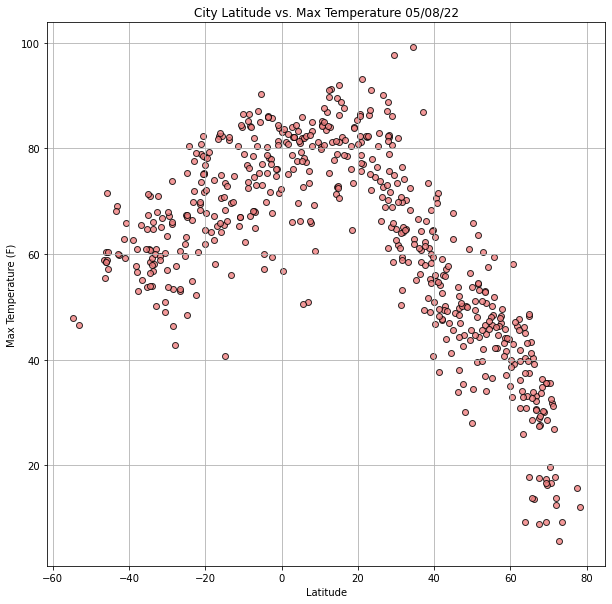

In [90]:
# Import time module
import time

# Cambia el tamaño de la imagen
plt.subplots(figsize=(10, 10))

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats, # Arriba están las variables que vamos a graficarS
            max_temps,
            c="lightcoral",
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("Weather_data/Fig1.png")

# Show plot.
plt.show()

# Humidity

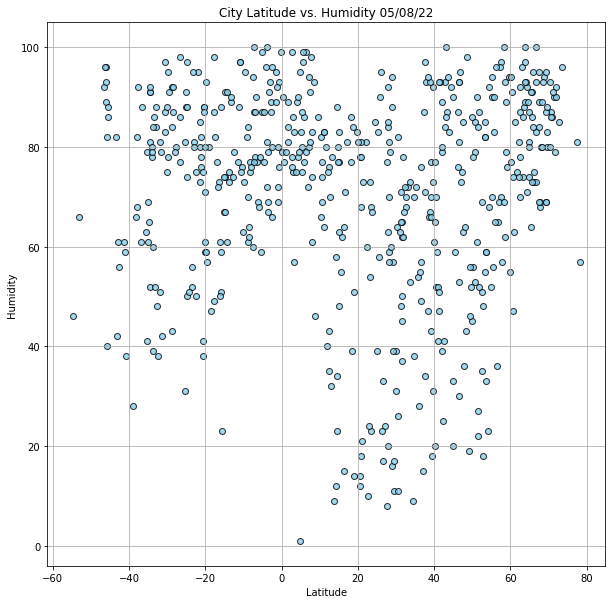

In [91]:
# Cambia el tamaño de la imagen
plt.subplots(figsize=(10, 10))

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats, # Arriba están las variables que vamos a graficarS
            humidity,
            c="skyblue",
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("Weather_data/Fig2.png")

# Show plot.
plt.show()

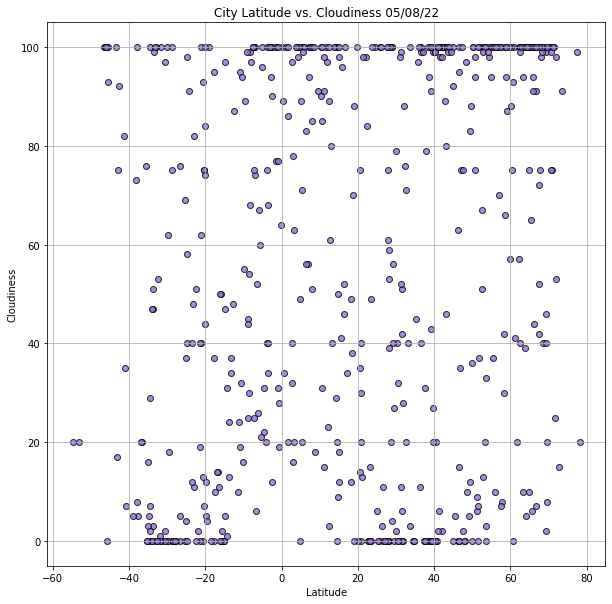

In [93]:
# Cambia el tamaño de la imagen
plt.subplots(figsize=(10, 10))

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats, # Arriba están las variables que vamos a graficarS
            cloudiness,
            c="mediumpurple",
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("Weather_data/Fig3.png")

# Show plot.
plt.show()

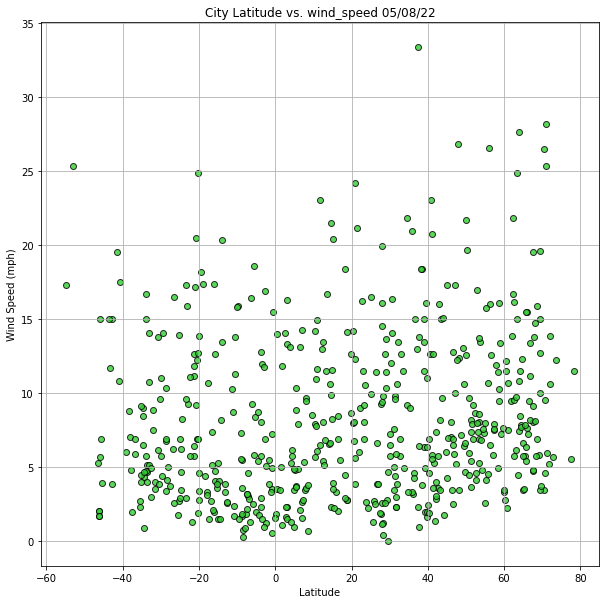

In [94]:
# Cambia el tamaño de la imagen
plt.subplots(figsize=(10, 10))

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats, # Arriba están las variables que vamos a graficarS
            wind_speed,
            c="limegreen",
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. wind_speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("Weather_data/Fig4.png")

# Show plot.
plt.show()